#### Task 3(c): Take a grayscale image of size 512x512, apply harmonic & geometric mean filter on the noisy image & compare their performance with PSNR

### Importing the Libraries

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Harmonic Mean Filtering
Let, an array $A=[x_1, x_2, x_3, ..., x_n]$ where $n$ = size of $A$ then, Harmonic Mean ($HM$) can be calculated as follows:
$$HM = \frac{n}{\frac{1}{x_1}+\frac{1}{x_2}+\frac{1}{x_3}+\dots+\frac{1}{x_n}}$$
##### The Harmonic Mean Filter works well for salt noise, but fails for pepper noise

In [29]:
def apply_harmonic_mean_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape 
    offset, number_of_pixel = mask_size // 2, mask_size * mask_size

    for r in range(height):
        for c in range(width):
            pixel = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixel += float(1 / (image[r + x, c + y] + 1e-4))
            pixel = number_of_pixel / pixel
            filtered_image[r, c] = 255 if pixel > 255 else pixel

    return np.uint8(filtered_image)

## Geometric Mean Filtering
Let, an array $A=[x_1, x_2, x_3, ..., x_n]$ where $n$ = size of $A$ then, Geometric Mean ($GM$) can be calculated as follows:
$$GM = \sqrt[n]{x_1 \times x_2 \times x_3 \times \dots \times x_n}$$

In [30]:
def apply_geometric_mean_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset = mask_size // 2

    for r in range(height):
        for c in range(width):
            pixel = 1
            count = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if r + x >= 0 and r + x < height and c + y >= 0 and c + y < width:
                        if image[r + x, c + y]:
                            count += 1
                            pixel = pixel * int(image[r + x, c + y])
            count = 1 if count == 0 else count
            filtered_image[r, c] = pixel ** (1 / count)

    return np.uint8(filtered_image)

### Function for adding Salt & Pepper Noise

In [31]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent / 100)

    for k in range(int(noise_amount)):
        index = []
        for x in range(1, 5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255

    return noisy_image

### PSNR (Peak Signal to Noise Ratio)
PSNR can be calculate as follows:
$$PSNR = 10 \times log{_{10}}{\frac{(max\_pixel\_value)^2}{MSE}}$$
and MSE (Mean Squared Error) can be calculated as follows:
$$MSE=\frac{1}{n}\sum_{i = 1}^{n}(x_i-\hat{x}_i)^2$$
where,  
$x_i$ = $i$-th pixel of original image  
$\hat{x}_i$ = $i$-th pixel of filtered image
##### Function: psnr = cv2.PSNR(image1, image2)

In [32]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    
    return round(psnr, 2)

### Loading the Image

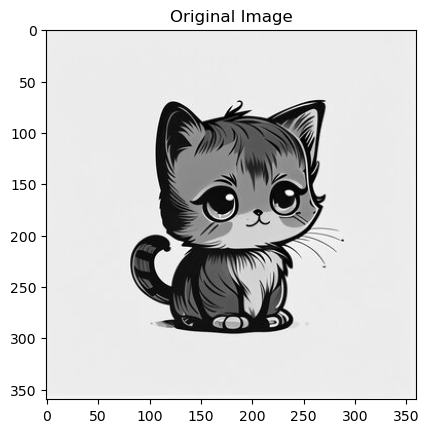

In [33]:
character_image = cv2.imread("./Cat 360x360.jpg", 0)
plt.imshow(character_image, cmap = "gray")
plt.title("Original Image")
plt.show()

### Adding Salt & Pepper Noise to the Image

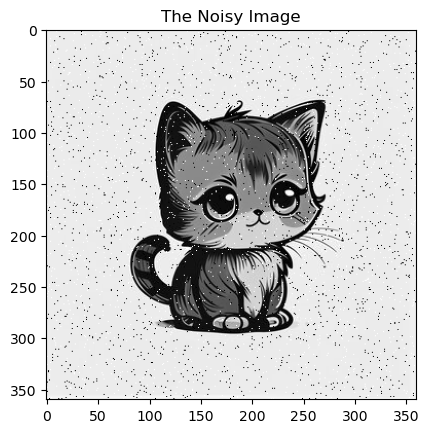

PSNR = 19.15


In [34]:
noisy_character_image = add_salt_pepper_noise(character_image, 1.5)
plt.imshow(noisy_character_image, cmap = "gray")
plt.title("The Noisy Image")
plt.show()
psnr = compute_psnr(character_image, noisy_character_image)
print(f"PSNR = {psnr}")

### Applying Harmonic Mean Filter

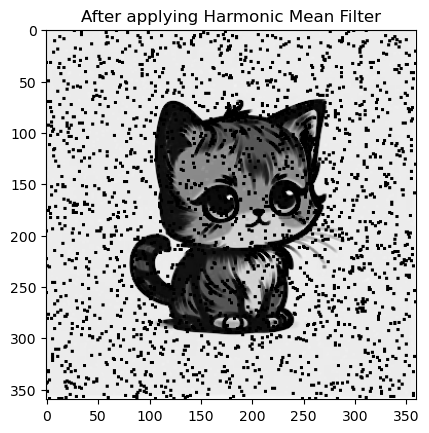

PSNR = 10.54


In [35]:
mask_size = 3
harmonic_filtered_image = apply_harmonic_mean_filter(noisy_character_image, mask_size)
plt.imshow(cv2.cvtColor(harmonic_filtered_image, cv2.COLOR_BGR2RGB))
plt.title("After applying Harmonic Mean Filter")
plt.show()
print(f"PSNR = {compute_psnr(noisy_character_image, harmonic_filtered_image)}")

### Applying Geometric Mean Filter

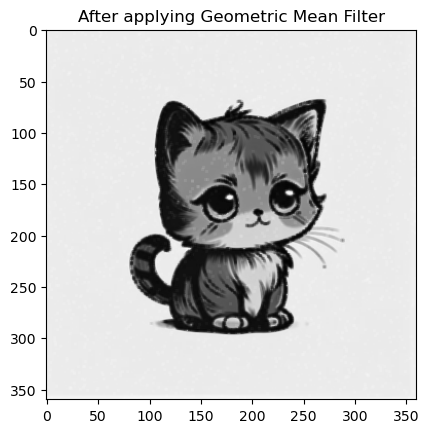

PSNR = 17.95


In [36]:
geometric_filtered_image = apply_geometric_mean_filter(noisy_character_image, mask_size)
plt.imshow(cv2.cvtColor(geometric_filtered_image, cv2.COLOR_BGR2RGB))
plt.title("After applying Geometric Mean Filter")
plt.show()
print(f"PSNR = {compute_psnr(noisy_character_image, geometric_filtered_image)}")